## Задание
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [187]:
# Создаем распределение Парето и выборку из него размером 1000
b = 3
pareto_rv = sts.pareto(b)
x = np.linspace(1, 3, 1000)
sample = pareto_rv.rvs(1000)

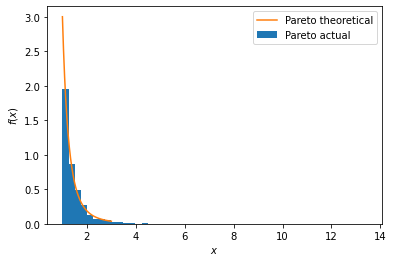

In [190]:
# Отрисовываем гистограмму выборки и теореретическую плотность распределения
plt.hist(sample, 50, density=True, label='Pareto actual')
pdf = pareto_rv.pdf(x)
plt.plot(x, pdf, label='Pareto theoretical')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

In [191]:
# С помощью википедии высчитываем среднее отклонение и дисперсию (mu и dis)
mu = 1.5
dis = 0.75

0.3872983346207417


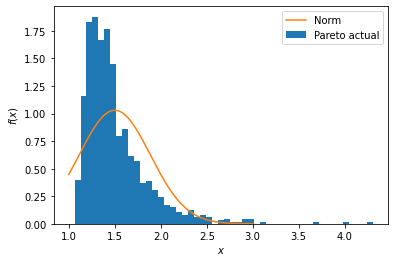

In [202]:
# Генерируем 1000 выборок размером n = 5 и находим их выборочные средние (функция mean())
n = 5
sample_1 = np.zeros(1000)
for i in range(1000):
    sample_1[i] = pareto_rv.rvs(n).mean()

# Высчитваем среднее отклонение по выборке
sigma = np.sqrt(dis / n)
print(sigma)

# Отрисовываем гистограмму данной выборки и плотность соответствующего нормального распределения
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x)
plt.hist(sample_1, 50, density=True, label='Pareto actual')
plt.plot(x, pdf, label='Norm')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

0.17320508075688773


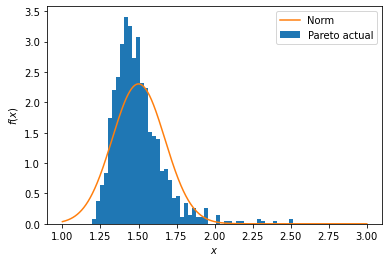

In [204]:
# Генерируем 1000 выборок размером n = 10 и находим их выборочные средние
n = 25
sample_2 = np.zeros(1000)
for i in range(1000):
    sample_2[i] = pareto_rv.rvs(n).mean()

# Высчитваем среднее отклонение по выборке
sigma = np.sqrt(0.75 / n)
print(sigma)

# Отрисовываем гистограмму данной выборки и плотность соответствующего нормального распределения
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x)
plt.hist(sample_2, 50, density=True, label='Pareto actual')
plt.plot(x, pdf, label='Norm')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

0.08660254037844387


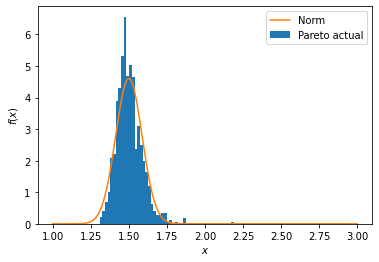

In [205]:
# Генерируем 1000 выборок размером n = 100 и находим их выборочные средние
n = 100
sample_3 = np.zeros(1000)
for i in range(1000):
    sample_3[i] = pareto_rv.rvs(n).mean()
    
# Высчитваем среднее отклонение по выборке
sigma = np.sqrt(0.75 / n)
print(sigma)

# Отрисовываем гистограмму данной выборки и плотность соответствующего нормального распределения
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x)
plt.hist(sample_3, 50, density=True, label='Pareto actual')
plt.plot(x, pdf, label='Norm')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

### Выводы
При различных значениях n полученные распределения отличаются и с увеличением n точность аппроксимации распределения выборочных средних так же увеличивается. То есть, чем больше размер выборки, тем точнее аппроксимация.